# Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [148]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [149]:
df=pd.read_csv('file:///F:/New%20folder%20(7)/heart%20(1).csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [150]:
df.shape

(303, 14)

In [151]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [152]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [153]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

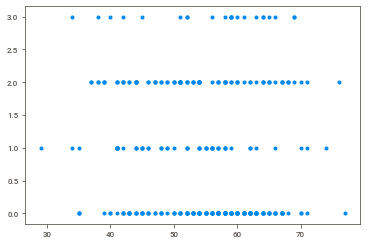

In [154]:
plt.scatter(df[['age']],df['cp'])

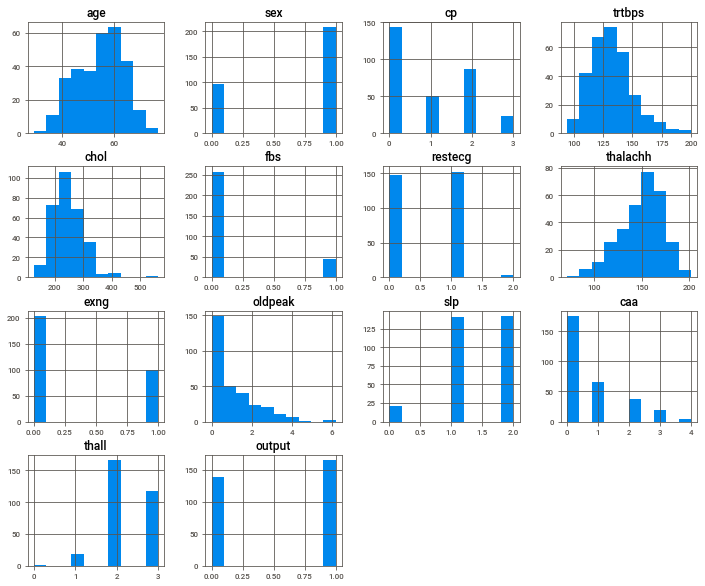

In [155]:
df.hist(figsize=(12,10))
plt.show()

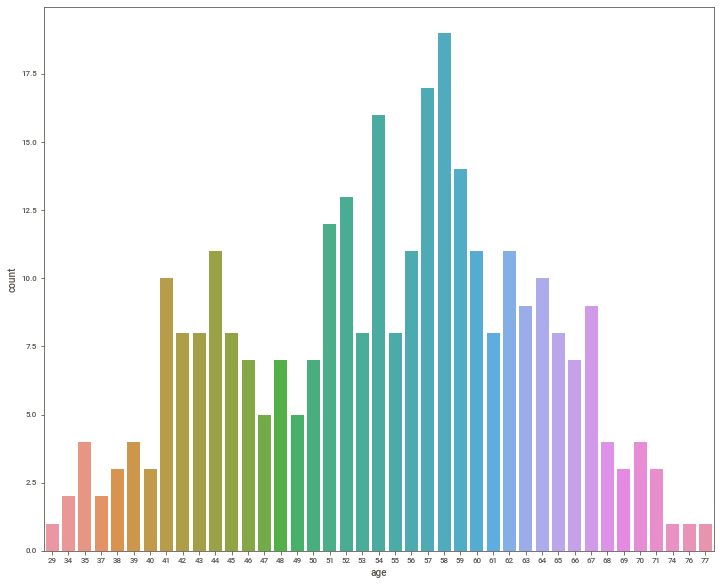

In [156]:
plt.figure(figsize=(12,10))
sns.countplot(df['age'])

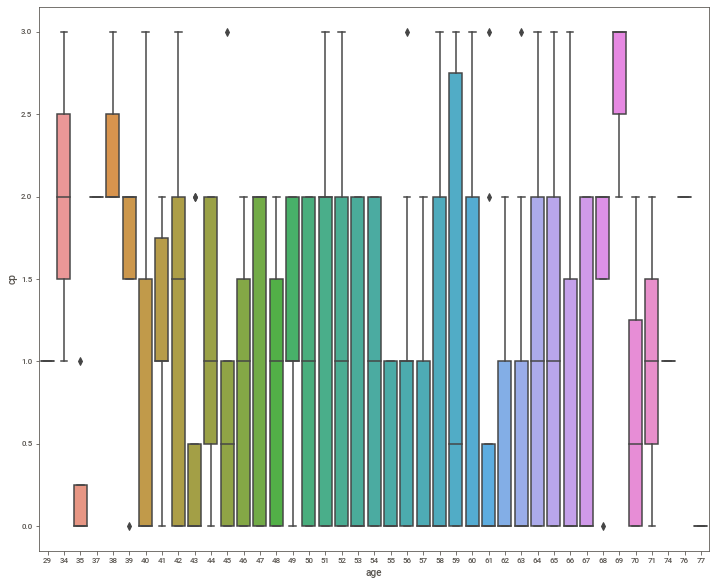

In [157]:
plt.figure(figsize=(12,10))
sns.boxplot(x='age',y='cp',data=df)

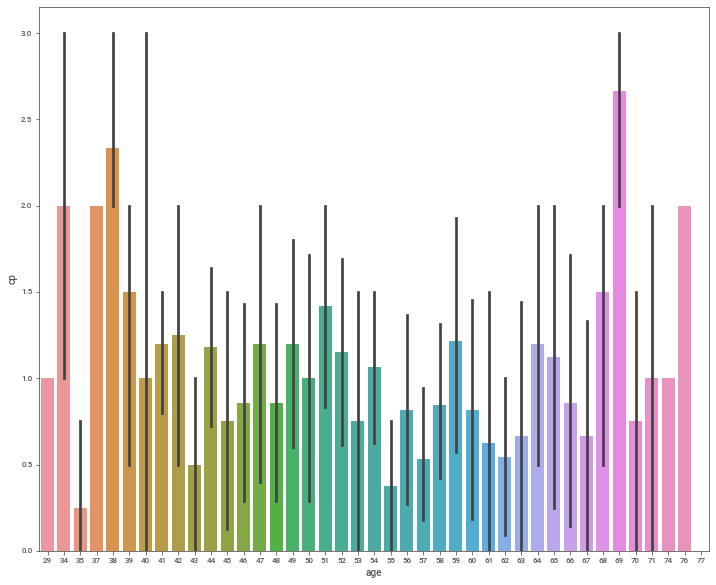

In [158]:
plt.figure(figsize=(12,10))
sns.barplot(df['age'],df['cp'])

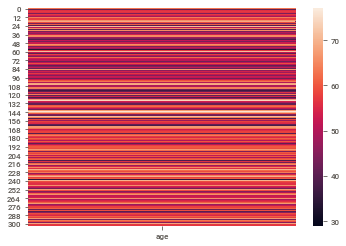

In [159]:
sns.heatmap(df[['age']])

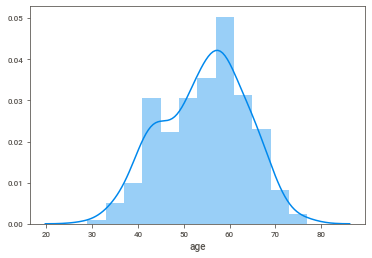

In [160]:
sns.distplot(df['age'])

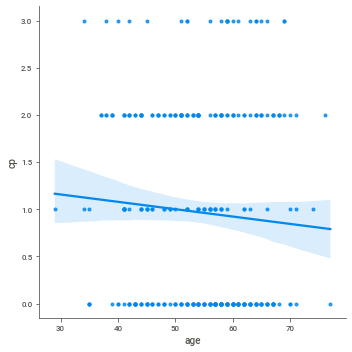

In [161]:
sns.lmplot(x='age',y='cp',data=df)

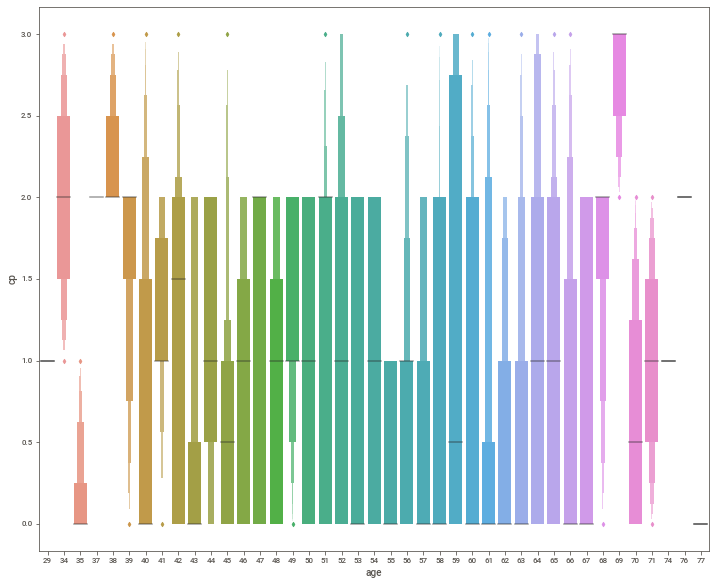

In [162]:
plt.figure(figsize=(12,10))
sns.boxenplot(x='age',y='cp',data=df)

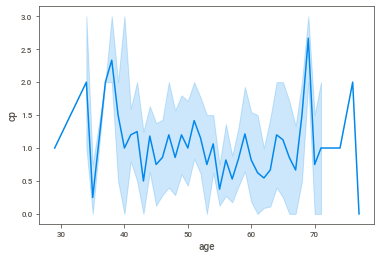

In [163]:
sns.lineplot(x='age',y='cp',data=df)

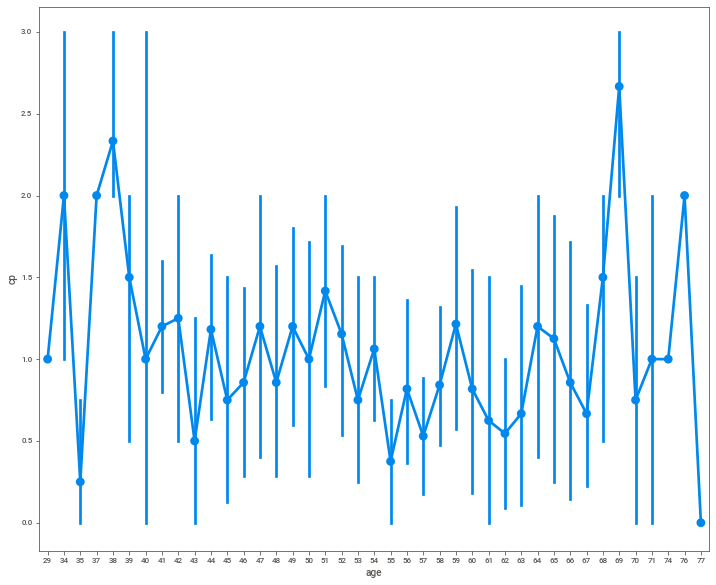

In [164]:
plt.figure(figsize=(12,10))
sns.pointplot(x='age',y='cp',data=df)

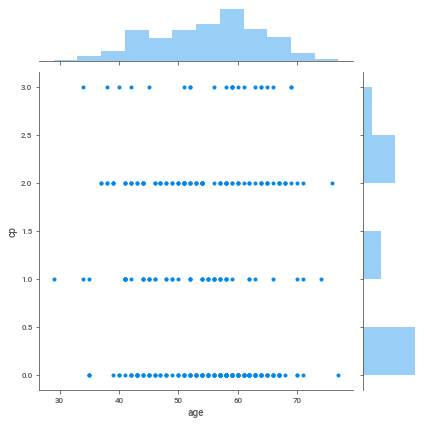

In [165]:
sns.jointplot(x='age',y='cp',data=df)

In [167]:
df.groupby('age').cp.value_counts()

age  cp
29   1     1
34   1     1
     3     1
35   0     3
     1     1
          ..
71   1     1
     2     1
74   1     1
76   2     1
77   0     1
Name: cp, Length: 108, dtype: int64

In [168]:
#sns.pairplot(df)

In [169]:
x=df.age.values
y=df.cp.values

In [170]:
x.shape

(303,)

In [171]:
x=x.reshape(-1,1)

In [172]:
x.shape

(303, 1)

In [173]:
y=y.reshape(-1,1)

In [174]:
x.shape

(303, 1)

In [175]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [176]:
xtrain.shape

(212, 1)

In [177]:
ytrain.shape

(212, 1)

In [178]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
li.score(xtest,ytest)

-0.04157545351337677

In [180]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
lo.score(xtest,ytest)

0.4835164835164835

In [182]:
li.fit(df[['age']],df.cp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
li.predict([[63]])

array([0.89964165])

In [184]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
tre.score(xtest,ytest)

0.46153846153846156

In [186]:
tre.fit(df[['age']],df.cp)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
tre.predict([[63]])

array([0], dtype=int64)

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
rfc.score(xtest,ytest)

0.43956043956043955

In [191]:
rfc.fit(df[['age']],df.cp)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
rfc.predict([[63]])

array([0], dtype=int64)

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
mnc=MinMaxScaler(feature_range=(0,1))

In [195]:
variable=mnc.fit_transform(x)

In [196]:
variable

array([[0.70833333],
       [0.16666667],
       [0.25      ],
       [0.5625    ],
       [0.58333333],
       [0.58333333],
       [0.5625    ],
       [0.3125    ],
       [0.47916667],
       [0.58333333],
       [0.52083333],
       [0.39583333],
       [0.41666667],
       [0.72916667],
       [0.60416667],
       [0.4375    ],
       [0.60416667],
       [0.77083333],
       [0.29166667],
       [0.83333333],
       [0.625     ],
       [0.3125    ],
       [0.27083333],
       [0.66666667],
       [0.22916667],
       [0.875     ],
       [0.625     ],
       [0.45833333],
       [0.75      ],
       [0.5       ],
       [0.25      ],
       [0.75      ],
       [0.3125    ],
       [0.52083333],
       [0.45833333],
       [0.35416667],
       [0.52083333],
       [0.52083333],
       [0.75      ],
       [0.75      ],
       [0.45833333],
       [0.39583333],
       [0.33333333],
       [0.5       ],
       [0.20833333],
       [0.47916667],
       [0.3125    ],
       [0.375

In [197]:
from sklearn.naive_bayes import MultinomialNB

In [198]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [199]:
mnb.score(xtest,ytest)

0.5384615384615384

In [200]:
from sklearn.naive_bayes import GaussianNB

In [201]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [202]:
gnb.score(xtest,ytest)

0.4835164835164835

In [203]:
from sklearn.naive_bayes import BernoulliNB

In [204]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [205]:
ber.score(xtest,ytest)

0.5384615384615384

In [206]:
from sklearn.svm import SVC

In [207]:
svc=SVC()
svc.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [208]:
svc.score(xtest,ytest)

0.4835164835164835

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
rdf.score(xtest,ytest)

0.42857142857142855

In [212]:
import sweetviz as sv

In [213]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [217]:
from IPython.display import IFrame

In [218]:
IFrame(src='Analyze.html',width=1000,height=600)

In [219]:
from dataprep.eda import *

  0%|          | 0/2138 [00:00<?, ?it/s]

DataPrep Report
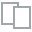
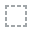
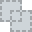
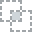
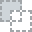
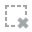
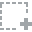
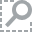
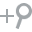
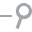
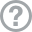
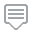
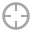
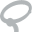
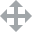
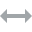
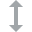
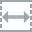
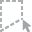
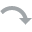
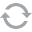
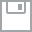
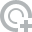
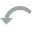
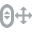
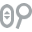
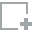
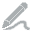
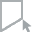
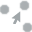
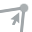
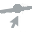

In [220]:
create_report(df)